In [1]:
################# Data Analysis & Calculation #################
import numpy as np 
import pandas as pd  

import os

################# ignore Warning #################
import warnings
warnings.filterwarnings("ignore")

################# visualization #################
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\xAPI-Edu-Data.csv")

In [3]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

<Axes: >

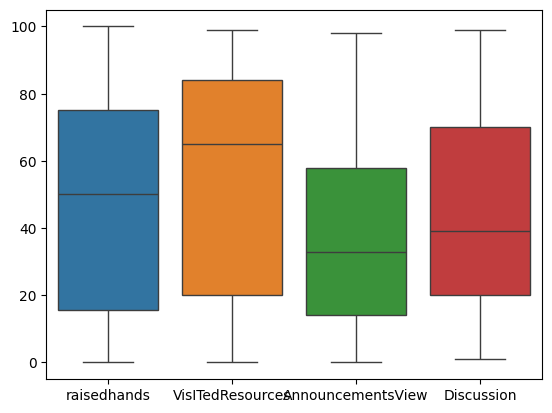

In [7]:
sns.boxplot(data=df)

In [8]:
df.Class.value_counts(normalize=True)

Class
M    0.439583
H    0.295833
L    0.264583
Name: proportion, dtype: float64

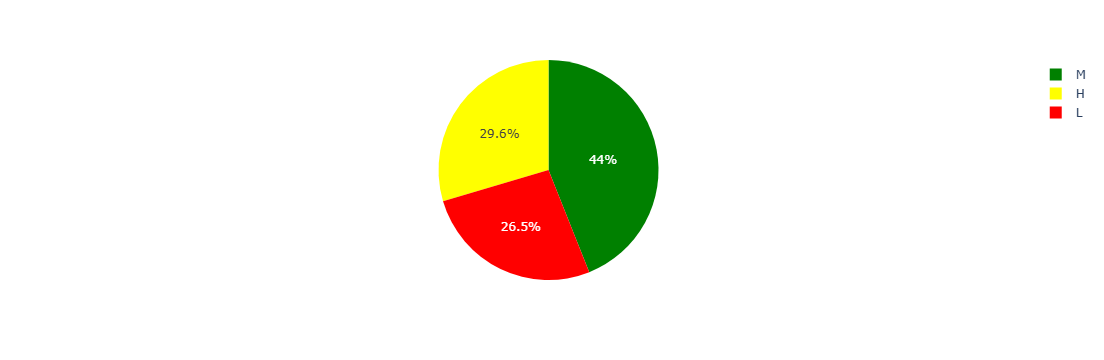

In [9]:
import plotly.express as px

fig= px.pie(df,names='Class',color='Class',
            color_discrete_map={'M':'green','H':'yellow','L':'red'})
fig.show()

### LableEncoder

In [11]:
dfnum= df.select_dtypes(include=np.number)
dfnum.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [12]:
dfcat=df.select_dtypes(include=object)
dfcat.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [13]:
from sklearn.preprocessing import LabelEncoder

dfcat=dfcat.apply(LabelEncoder().fit_transform)
dfcat.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


In [14]:
dfcombined=pd.concat([dfnum,dfcat],axis=1)
dfcombined.head(30)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,15,16,2,20,1,4,4,2,1,0,7,0,0,1,1,1,2
1,20,20,3,25,1,4,4,2,1,0,7,0,0,1,1,1,2
2,10,7,0,30,1,4,4,2,1,0,7,0,0,0,0,0,1
3,30,25,5,35,1,4,4,2,1,0,7,0,0,0,0,0,1
4,40,50,12,50,1,4,4,2,1,0,7,0,0,0,0,0,2
5,42,30,13,70,0,4,4,2,1,0,7,0,0,1,0,0,2
6,35,12,0,17,1,4,4,1,4,0,8,0,0,0,0,0,1
7,50,10,15,22,1,4,4,1,4,0,8,0,0,1,1,1,2
8,12,21,16,50,0,4,4,1,4,0,8,0,0,1,1,1,2
9,70,80,25,70,0,4,4,1,4,1,7,0,0,1,1,1,2


### Data partition

In [16]:
from sklearn.model_selection import train_test_split
x=dfcombined.drop('Class',axis=1)
y=dfcombined['Class']

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=99)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 365 to 129
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   raisedhands               336 non-null    int64
 1   VisITedResources          336 non-null    int64
 2   AnnouncementsView         336 non-null    int64
 3   Discussion                336 non-null    int64
 4   gender                    336 non-null    int64
 5   NationalITy               336 non-null    int64
 6   PlaceofBirth              336 non-null    int64
 7   StageID                   336 non-null    int64
 8   GradeID                   336 non-null    int64
 9   SectionID                 336 non-null    int64
 10  Topic                     336 non-null    int64
 11  Semester                  336 non-null    int64
 12  Relation                  336 non-null    int64
 13  ParentAnsweringSurvey     336 non-null    int64
 14  ParentschoolSatisfaction  336 non-null    int

In [18]:
y_train

365    0
280    0
432    2
275    0
293    0
      ..
201    0
168    0
185    0
35     1
129    1
Name: Class, Length: 336, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector as SFS

multimodel=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)

model=SFS(multimodel,n_features_to_select=5,direction='backward',scoring='accuracy',cv=2)

model=model.fit(X_train,y_train)

In [20]:
model.feature_names_in_

array(['raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion', 'gender', 'NationalITy', 'PlaceofBirth', 'StageID',
       'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'], dtype=object)

In [21]:
model.get_feature_names_out()


array(['raisedhands', 'VisITedResources', 'Discussion', 'Relation',
       'StudentAbsenceDays'], dtype=object)

In [70]:
X_train1=X_train.loc[:,['raisedhands', 'VisITedResources', 'Discussion', 'Relation',
       'StudentAbsenceDays']]

In [72]:
y_train

365    0
280    0
432    2
275    0
293    0
      ..
201    0
168    0
185    0
35     1
129    1
Name: Class, Length: 336, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression

finalmodel=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)

finalmodel.fit(X_train1,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [78]:
Train=pd.concat([X_train1,y_train],axis=1)

In [80]:
Train.head()

,raisedhands,VisITedResources,Discussion,Relation,StudentAbsenceDays,Class
365,78,70,29,0,1,0
280,74,71,37,1,1,0
432,95,87,81,0,1,2
275,90,62,60,1,1,0
293,62,64,84,1,1,0


In [102]:
probabilties=finalmodel.predict_proba(X_train1)

In [104]:
probabilties.shape

(336, 3)

In [106]:
Train.loc[:,['p_class_0','p_class_1','p_class_2']]=probabilities

In [108]:
Train.head()

,raisedhands,VisITedResources,Discussion,Relation,StudentAbsenceDays,Class,p_class_0,p_class_1,p_class_2
365,78,70,29,0,1,0,0.350368,0.009776,0.639857
280,74,71,37,1,1,0,0.702877,0.004945,0.292178
432,95,87,81,0,1,2,0.579971,0.000983,0.419046
275,90,62,60,1,1,0,0.752711,0.002682,0.244607
293,62,64,84,1,1,0,0.699134,0.003919,0.296947


In [110]:
Train['predicted']=np.argmax(probabilities,axis=1)

In [112]:
Train.head()

,raisedhands,VisITedResources,Discussion,Relation,StudentAbsenceDays,Class,p_class_0,p_class_1,p_class_2,predicted
365,78,70,29,0,1,0,0.350368,0.009776,0.639857,2
280,74,71,37,1,1,0,0.702877,0.004945,0.292178,0
432,95,87,81,0,1,2,0.579971,0.000983,0.419046,0
275,90,62,60,1,1,0,0.752711,0.002682,0.244607,0
293,62,64,84,1,1,0,0.699134,0.003919,0.296947,0


In [118]:
from sklearn.metrics import classification_report

print(classification_report(Train['Class'],Train['predicted']))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       109
           1       0.85      0.85      0.85        92
           2       0.72      0.67      0.69       135

    accuracy                           0.76       336
   macro avg       0.77      0.77      0.77       336
weighted avg       0.76      0.76      0.76       336



### prediction on the test data

In [121]:
X_test= X_test.loc[:,['raisedhands', 'VisITedResources', 'Discussion', 'Relation',
       'StudentAbsenceDays']]

In [125]:
Test=pd.concat([X_test,y_test],axis=1)

In [127]:
Test.head()

,raisedhands,VisITedResources,Discussion,Relation,StudentAbsenceDays,Class
32,2,19,50,0,0,1
360,20,88,28,0,0,2
247,87,48,96,0,0,2
269,18,28,20,0,0,2
209,70,81,84,0,1,2


In [131]:
test_probabilities= finalmodel.predict_proba(X_test)

In [133]:
test_probabilities.shape


(144, 3)

In [135]:
Test.loc[:,['P_Class_0','p_class_1','p_class_2']]=test_probabilities

In [137]:
Test.head()

,raisedhands,VisITedResources,Discussion,Relation,StudentAbsenceDays,Class,P_Class_0,p_class_1,p_class_2
32,2,19,50,0,0,1,0.001403,0.820407,0.178190
360,20,88,28,0,0,2,0.023296,0.261137,0.715567
247,87,48,96,0,0,2,0.061949,0.087727,0.850324
269,18,28,20,0,0,2,0.002081,0.788758,0.209162
209,70,81,84,0,1,2,0.454860,0.002699,0.542441


In [141]:
Test['predicted']=np.argmax(test_probabilities,axis=1)
Test.head()


,raisedhands,VisITedResources,Discussion,Relation,StudentAbsenceDays,Class,P_Class_0,p_class_1,p_class_2,predicted
32,2,19,50,0,0,1,0.001403,0.820407,0.178190,1
360,20,88,28,0,0,2,0.023296,0.261137,0.715567,2
247,87,48,96,0,0,2,0.061949,0.087727,0.850324,2
269,18,28,20,0,0,2,0.002081,0.788758,0.209162,1
209,70,81,84,0,1,2,0.454860,0.002699,0.542441,2


In [145]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(Test['Class'],Test['predicted'])
matrix

array([[21,  0, 12],
       [ 0, 34,  1],
       [14,  7, 55]])

In [151]:
from sklearn.metrics import classification_report
report=classification_report(Test['Class'],Test['predicted'])
print(report)


              precision    recall  f1-score   support

           0       0.60      0.64      0.62        33
           1       0.83      0.97      0.89        35
           2       0.81      0.72      0.76        76

    accuracy                           0.76       144
   macro avg       0.75      0.78      0.76       144
weighted avg       0.77      0.76      0.76       144



In [159]:
Model_Values = pd.DataFrame(finalmodel.intercept_,index=['Intercept','intercept2','intercept3'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,-4.728517
intercept2,3.908019
intercept3,0.820498


In [167]:
abc=pd.DataFrame(finalmodel.coef_.T,index=finalmodel.feature_names_in_,columns=['Coefficient1','coefficient2','coeffient3'])
abc

,Coefficient1,coefficient2,coeffient3
raisedhands,0.018755,-0.021094,0.002339
VisITedResources,0.024209,-0.030067,0.005858
Discussion,0.009852,-0.013237,0.003385
Relation,0.924633,-0.373605,-0.551028
StudentAbsenceDays,2.277598,-2.360895,0.083297
